In [120]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%load_ext google.colab.data_table


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


1. What is the biggest predictor of a large CO2 output per capita of a country?

2. Which countries are making the biggest strides in decreasing CO2 output?
3. Which non-fossil fuel energy technology will have the best price in the future?

In [46]:
df_population = pd.read_csv("/content/drive/MyDrive/Datasets/Final - Q1/population-marimekko.csv")
df_gdp = pd.read_csv("/content/drive/MyDrive/Datasets/Final - Q1/gdp-per-capita-worldbank.csv")
df_co2 = pd.read_csv("/content/drive/MyDrive/Datasets/Final - Q1/annual-co2-emissions-per-country.csv")
df_air_pas = pd.read_csv("/content/drive/MyDrive/Datasets/Final - Q1/air-passengers-carried.csv")

In [47]:
# Make datetime object of all the year columns an drop any empty columns. Drop unneccesary rows.

df_population['Year'] = pd.to_datetime(df_population['Year'], format="%Y", errors = "coerce")
df_population.dropna(axis = 0, subset = ["Year","Population (historical estimates)" ], inplace= True)
df_population.drop(columns=["Code","Continent"], inplace= True)
df_population.loc[df_population["Entity"] == "European Union (27)", "Entity"] = "European Union"

df_gdp['Year'] = pd.to_datetime(df_gdp['Year'], format="%Y", errors = "coerce")
df_gdp.dropna(axis = 0, subset = ["Year","GDP per capita, PPP (constant 2017 international $)" ], inplace= True)
df_gdp.drop(columns=["Code"], inplace= True)

df_co2["Year"] = pd.to_datetime(df_co2["Year"], format="%Y", errors = "coerce")
df_co2.dropna(axis = 0, subset = ["Year","Annual CO₂ emissions" ], inplace= True)
df_co2.drop(columns=["Code"], inplace= True)
df_co2.loc[df_co2["Entity"] == "European Union (27)", "Entity"] = "European Union"

df_air_pas['Year'] = pd.to_datetime(df_air_pas['Year'], format="%Y", errors = "coerce")
df_air_pas.dropna(axis = 0, subset = ["Year","Air transport, passengers carried" ], inplace= True)
df_air_pas.drop(columns=["Code"], inplace= True)

In [ ]:
# Merge the 3 differtent dataframes with the CO2 dataframe to compare and check the correlation. Drop the year 2020

combined_data_1 = df_co2.merge(df_air_pas,on=["Year", "Entity"]).merge(df_gdp,on=["Year", "Entity"]).merge(df_population, on=["Year", "Entity"])
select_year = combined_data_1['Year'] < "2020"
combined_data = combined_data_1[select_year]  

display(combined_data)
display(combined_data.corr())


In [ ]:
# Make the 4 different plots to visualise the growth of each component per country/continent

def select_country(df, country):
  select = df['Entity'] == country
  country_df = df[select]  
  return country_df

def make_plots(df, country):
  x_axis = select_country(df, country)["Year"]
  y_axis_co2 = select_country(df, country)["Annual CO₂ emissions"]
  y_axis_pop = select_country(df, country)["Population (historical estimates)"]
  y_axis_gdp = select_country(df, country)["GDP per capita, PPP (constant 2017 international $)"]
  y_axis_pas = select_country(df, country)["Air transport, passengers carried"]

  figure, axis = plt.subplots(2, 2, figsize=(15, 10))
  plt.suptitle(country)
  
  axis[0, 0].plot(x_axis, y_axis_co2)
  axis[0, 0].set_title("Annual CO₂ emissions")
  axis[0, 0].grid()

  axis[0, 1].plot(x_axis, y_axis_pas)
  axis[0, 1].set_title("Air transport, passengers carried")
  axis[0, 1].grid()

  axis[1, 0].plot(x_axis, y_axis_gdp)
  axis[1, 0].set_title("GDP per capita, PPP (constant 2017 international $)")
  axis[1, 0 ].grid()

  axis[1, 1].plot(x_axis, y_axis_pop)
  axis[1, 1].set_title("Population (historical estimates)")
  axis[1, 1].grid()

make_plots(combined_data, "World")
make_plots(combined_data, "European Union")
make_plots(combined_data, "China")
make_plots(combined_data, "United States")

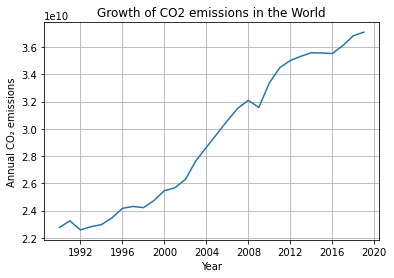

In [119]:
# Make the plot for the growth of co2 worldwide

merger_us = combined_data['Entity'] == "World"
us_plot = combined_data[merger_us]

x_axis = us_plot["Year"]
y_axis = us_plot["Annual CO₂ emissions"]

plt.plot(x_axis, y_axis)
plt.title('Growth of CO2 emissions in the World')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ emissions')
plt.grid()
plt.show()

,Annual CO₂ emissions,"Air transport, passengers carried","GDP per capita, PPP (constant 2017 international $)",Population (historical estimates)
Annual CO₂ emissions,1.000000,0.949908,0.040713,0.964331
"Air transport, passengers carried",0.949908,1.000000,0.090724,0.883990
"GDP per capita, PPP (constant 2017 international $)",0.040713,0.090724,1.000000,-0.031106
Population (historical estimates),0.964331,0.883990,-0.031106,1.000000


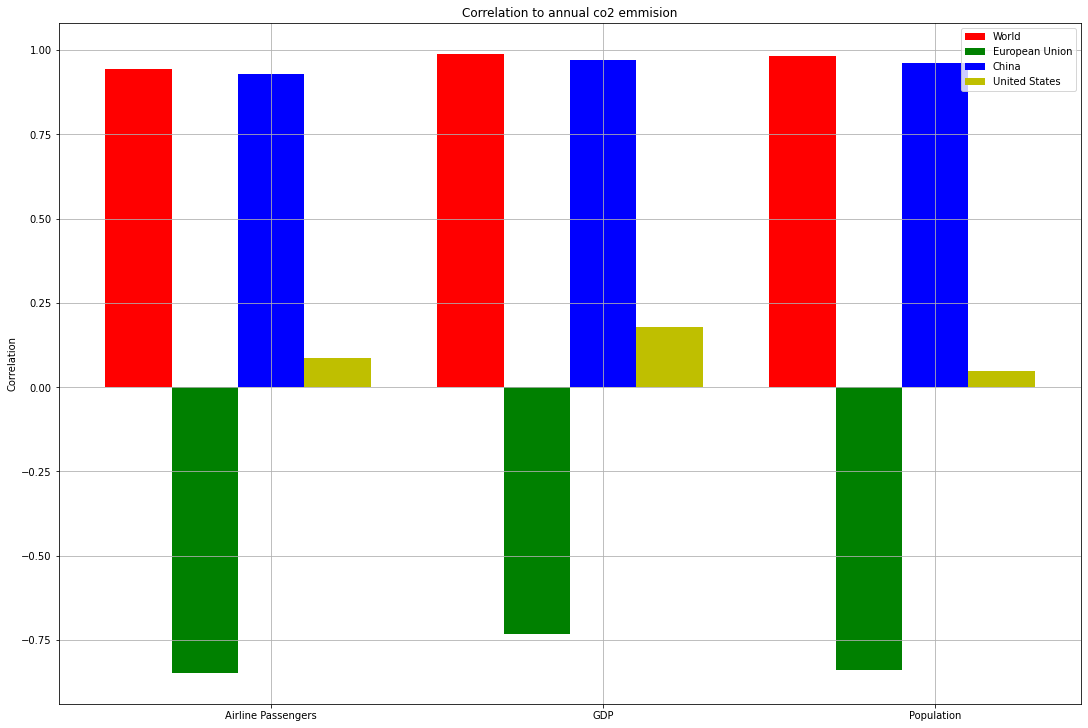

In [117]:
# Make a combined barchart per component and compared by country and continent

def select_country(df, country):
  select = df['Entity'] == country
  country_df = df[select]  
  return country_df

fig, ax = plt.subplots(layout='constrained',figsize=(15, 10))

N = 3
ind = np.arange(N) 
width = 0.2
  
xvals = select_country(combined_data, "World").corr()["Annual CO₂ emissions"][-3:]
bar1 = ax.bar(ind-width, xvals, width, color = 'r')
  
yvals = select_country(combined_data, "European Union").corr()["Annual CO₂ emissions"][-3:]
bar2 = ax.bar(ind, yvals, width, color='g')
  
zvals = select_country(combined_data, "China").corr()["Annual CO₂ emissions"][-3:]
bar3 = ax.bar(ind+width, zvals, width, color = 'b')

avals = select_country(combined_data, "United States").corr()["Annual CO₂ emissions"][-3:]
bar4 = ax.bar(ind+width*2, avals, width, color='y')
  

ax.set_ylabel('Correlation')
ax.set_title('Correlation to annual co2 emmision')
ax.set_xticks(ind+width,['Airline Passengers','GDP','Population'])
ax.legend((bar1, bar2, bar3, bar4),('World', 'European Union', 'China', "United States"), loc='upper right')
plt.grid()
plt.show()
